<img src="https://logos-download.com/wp-content/uploads/2016/12/National_University_of_Singapore_logo_NUS.png" style="float: left; margin: 20px; height: 55px">

# Hypothesis Testing

In [45]:
# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn.
import seaborn as sns

from statistics import mean


# Function for Biased Die

In [46]:
def biased_die(n, p):
    count = 0        
    for i in range(n): 
        
        while True:    
            die_throw = np.random.choice(['success','others'],
                                         p = [p, 1 - p])
            
            if die_throw == 'success': 
                    count += 1    
            break               
                     
    return (count / n)*100

# Probability of Fair Die

In [47]:
(1/6)*100

16.666666666666664

# n Independent Trials

In [103]:
biased_die(10, 0.66)

80.0

In [110]:
# np.random.seed(6)
biased_die(1000, 0.66)

67.0

In [115]:
biased_die(10000, 0.66)

65.79

# N experiments of n trials each

In [51]:
n = 1000 # n is the number of trial in each experiment

In [68]:
p = 0.8 # p is the determined probability of success

In [69]:
trial_list = []
for i in range(100):
    np.random.seed(i)
    x = biased_die(n, p)
    trial_list.append(x)

In [116]:
trial_list[:10]

[79.7, 80.4, 80.7, 80.7, 79.5, 80.9, 78.9, 79.4, 81.0, 80.9]

In [117]:
trial_df = pd.DataFrame(trial_list)

In [118]:
print(type(trial_df))

<class 'pandas.core.frame.DataFrame'>


In [119]:
trial_df.rename({0:'% Success'}, axis=1, inplace=True)
trial_df.head()

,% Success
0,79.7
1,80.4
2,80.7
3,80.7
4,79.5


## Average % Success of 100 Experiments

In [120]:
trial_mean = trial_df['% Success'].mean()
trial_mean

80.16300000000001

# Experimental Outcomes Plot

Text(0, 0.5, '% Success')

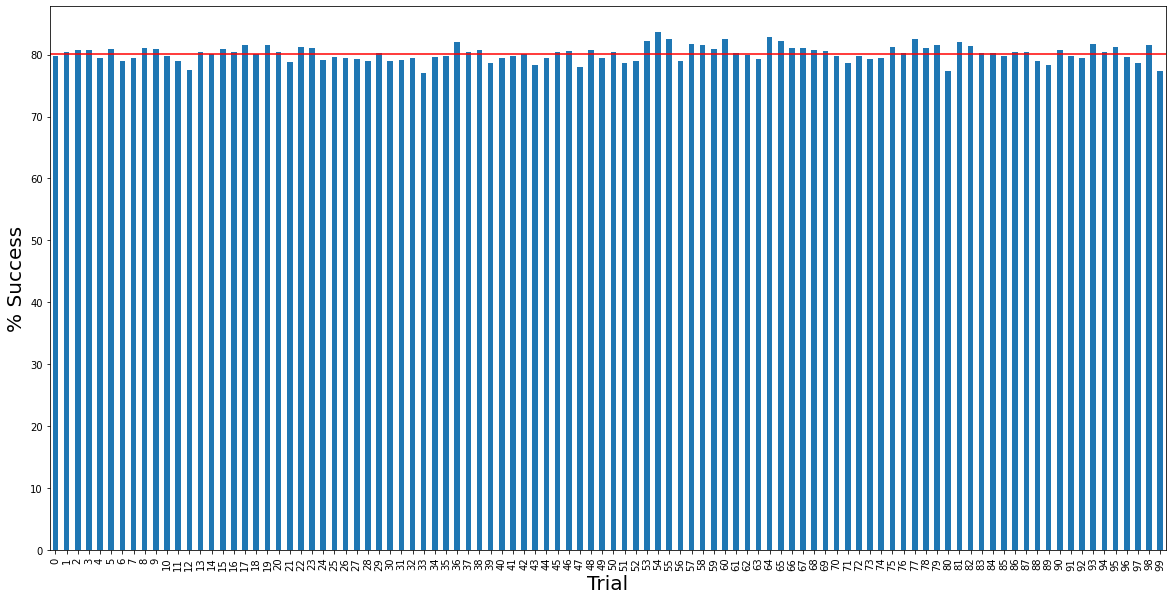

In [121]:
plt.figure(figsize=(20, 10))
trial_df['% Success'].plot(kind='bar')
plt.axhline(y = trial_df['% Success'].mean(), color = 'r', linestyle = '-')
plt.xlabel('Trial', fontsize=20)
plt.ylabel('% Success',fontsize=20)
# plt.axes.get_xaxis().set_visible(False)


# P-Value

Out of 100 Trials of 1000 Die-Tosses, the average rate of 6 facing up is 80.16%

In [76]:
actual_mean = (n*trial_mean)/100
actual_mean

801.6300000000001

Use Probability given Null Hypothesis is True

$X-Binom(1000, 1/6)$

Calculate probability of the event and more extreme cases. Ie 3306 times out of 10000 where 6 will appear face up. And also more than 3306.

$P(X=800)+P(X=801)+ .... + P(X=999) + P(X=1000)$

In [77]:
import scipy.stats as stats

In [93]:
null_probability = 1/6

In [94]:
stats.binom(n=n, p=null_probability).pmf(actual_mean)

0.0

In [95]:
prob = 0 
for i in range(800,1000):
        prob += stats.binom(n=n, p=null_probability).pmf(i)
prob

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.0

In [97]:
stats.binom(n=n, p=null_probability).cdf(actual_mean)

1.0

In [98]:
p_value = 1 - stats.binom(n=n, p=null_probability).cdf(actual_mean)
p_value = round(p_value, 7)
p_value

0.0

p-value is zero